# Google3D: YouTube Viral Video Forecasting

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

## Setup and Data Preprocessing
### 1. Set up project environment and create project documents.
### 2. Initial exploration of the dataset: identify and document missing values, outliers, and anomalies.
### 3. Data cleaning and transform data in Jupyter Notebook.

### Set up project environment and create project documents.
- Local environment is Jupyter Notebook.
- Cloud environment is Google Colab: [Colab Link](https://colab.research.google.com/drive/1cVB57dHD5CbpfPgP-XYBUL5nEoHCuiz2?usp=sharing)
- Project code maintained via GitHub: [Repo Link](https://github.com/rishitadhalbisoi/google3D)
- Project documents on Google Drive: [Drive Link](https://drive.google.com/drive/folders/1pNN3CvPdAQdRNCBkhGE_OcEM6hFn15vm?usp=sharing)

### Initial exploration of the dataset.

In [50]:
# Load dataset

dataset = 'US_YT_Trending_Data.csv'
df = pd.read_csv(dataset)
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ..."
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...


In [51]:
# Dataset size
print(f'{df.shape[0]} rows')
print(f'{df.shape[1]} columns')

268787 rows
16 columns


In [52]:
# Display first five rows

df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [53]:
# Display column names and corresponding data types

df.dtypes

# object- likely a string value

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [54]:
# Summary statistics for numerical data

df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,268787.000000,2.687870e+05,2.687870e+05,268787.000000,2.687870e+05
mean,18.743511,2.734467e+06,1.314697e+05,1134.277495,1.014303e+04
std,6.786562,9.794087e+06,4.539469e+05,8047.291315,7.260853e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.725410e+05,1.796300e+04,0.000000,1.280000e+03
50%,20.000000,9.368710e+05,4.020500e+04,0.000000,2.754000e+03
75%,24.000000,2.106178e+06,9.877300e+04,467.000000,6.386000e+03
max,29.000000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06


In [55]:
# Summary statistics for categorical data

df.describe(include=['object'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,268787,268787,268787,268787,268787,268787,268787,268787,264238
unique,47142,48471,46554,8302,8543,1323,32909,47142,48448
top,tnTPaLOaHz8,Starlink Mission,2023-12-16T17:00:01Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,2021-06-14T00:00:00Z,[None],https://i.ytimg.com/vi/tnTPaLOaHz8/default.jpg,Check out our other channels:NFL Mundo https:/...
freq,37,238,46,1793,1793,400,44494,37,853


In [56]:
# Look at the number of unique channel ids = 8302
# Videos from these channels may be more likely to go viral

df['channelId'].nunique()

8302

In [57]:
df['view_count'].describe()

count    2.687870e+05
mean     2.734467e+06
std      9.794087e+06
min      0.000000e+00
25%      4.725410e+05
50%      9.368710e+05
75%      2.106178e+06
max      1.407644e+09
Name: view_count, dtype: float64

### Identify and document missing values, outliers, and anomalies.

In [58]:
# Check for missing values

missing_values = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100

# Document missing data

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing data- only the description column has null values

missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df

,Missing Values,Percentage
description,4549,1.692418


In [59]:
numerical_cols_to_check = df.select_dtypes(include=[np.number]).columns

# Calculate IQR to identify outliers

def calculate_iqr_outliers(param_df):
    outliers_mask = pd.DataFrame(False, index=param_df.index, columns=param_df.columns)

    for column in param_df.columns:
        Q1 = param_df[column].quantile(0.25)
        Q3 = param_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask[column] = (param_df[column] < lower_bound) | (param_df[column] > upper_bound)

    outliers_any_column = outliers_mask.any(axis=1)
    outliers_df = param_df[outliers_any_column]

    return outliers_df

outliers_df = calculate_iqr_outliers(df[numerical_cols_to_check])
outliers_df['video_id'] = df.loc[outliers_df.index, 'video_id'].values
outliers_df = outliers_df.reset_index(drop=True)
outliers_df

# 78827 rows have outliers in their numerical data

,categoryId,view_count,likes,dislikes,comment_count,video_id
0,22,1514614,156908,5855,35313,3C66w5Z0ixs
1,20,2381688,146739,2794,16549,M9Pmf9AB4Mo
2,24,2038853,353787,2628,40221,J78aPJ3VyNs
3,10,496771,23251,1856,7647,kXLn3HkpjaA
4,24,1402687,95694,2158,6613,SnsPZj91R7E
...,...,...,...,...,...,...
78822,1,1048965,61823,0,3561,jyYIiWZNptQ
78823,1,3049093,207252,0,13835,SV9SwKd6J3w
78824,10,5406115,156300,0,7471,ktjvgseCjYE
78825,24,23820264,720335,0,33664,d7DdLRe5QgM


In [60]:
# Identifying anomalies via Z-score

z_scores = np.abs(stats.zscore(df[numerical_cols_to_check]))
z_anomalies_df = df[(z_scores > 3).any(axis=1)]
z_anomalies_df

# Z-score detection yields 4941 anomalies

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
35,GGEBtW2mWOk,Addressing RUMORS About Me While Testing New M...,2020-08-09T19:00:30Z,UCkvK_5omS-42Ovgah8KRKtg,jeffreestar,26,2020-08-12T00:00:00Z,jeffree star|jeffree star cosmetics|patrick st...,3427335,147162,62615,32307,https://i.ytimg.com/vi/GGEBtW2mWOk/default.jpg,False,False,Today I'm testing out ALL brand new makeup whi...
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,10,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,https://i.ytimg.com/vi/hsm4poTWjMs/default.jpg,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...
128,QsUfsZzxi9c,"Whatever You Build, I'll Pay For!",2020-08-06T17:00:23Z,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2020-08-12T00:00:00Z,[None],13073796,1643982,16286,97749,https://i.ytimg.com/vi/QsUfsZzxi9c/default.jpg,False,False,We have a giant area of land and whatever you ...
159,JSAfPh1A25E,TREASURE - 'BOY' M/V,2020-08-07T09:00:09Z,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),24,2020-08-12T00:00:00Z,YG Entertainment|YG|와이지|K-pop|트레져|트레저|TREASURE...,18534845,1447194,25142,335075,https://i.ytimg.com/vi/JSAfPh1A25E/default.jpg,False,False,BOY Woah ohYeah넌 마치 beautiful danger쳐다볼 수 없어너무...
260,GGEBtW2mWOk,Addressing RUMORS About Me While Testing New M...,2020-08-09T19:00:30Z,UCkvK_5omS-42Ovgah8KRKtg,jeffreestar,26,2020-08-13T00:00:00Z,jeffree star|jeffree star cosmetics|patrick st...,3635239,152011,66088,33959,https://i.ytimg.com/vi/GGEBtW2mWOk/default.jpg,False,False,Today I'm testing out ALL brand new makeup whi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268578,mKdjycj-7eE,"Stop This Train, Win a Lamborghini",2024-03-16T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-14T00:00:00Z,[None],116840290,4302366,0,127313,https://i.ytimg.com/vi/mKdjycj-7eE/default.jpg,False,False,I still can’t believe what happened in this vi...
268580,kRlxTJSPKK8,Natanael Cano || BZRP Music Sessions #59,2024-04-04T00:00:30Z,UCmS75G-98QihSusY7NfCZtw,Bizarrap,24,2024-04-14T00:00:00Z,Bizarrap|Bzrp|bzpp|bizapop|music session|bisar...,25109822,1503617,0,108925,https://i.ytimg.com/vi/kRlxTJSPKK8/default.jpg,False,False,00:00 Endiamantado02:33 Entre las de 20Natan...
268636,erLbbextvlY,7 Days Stranded On An Island,2024-03-30T16:00:01Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-15T00:00:00Z,[None],117202051,4772606,0,133663,https://i.ytimg.com/vi/erLbbextvlY/default.jpg,False,False,I can’t believe we actually did thisSend money...
268702,wboGYls1Bns,Pushpa 2 The Rule Teaser | Allu Arjun | Sukuma...,2024-04-08T05:37:05Z,UCKZSn5C-RzrLjuWJF8wWiDw,Mythri Movie Makers,24,2024-04-15T00:00:00Z,Pushpa 2 The Rule Teaser|Allu Arjun|Sukumar|Ra...,112497953,1634699,0,54080,https://i.ytimg.com/vi/wboGYls1Bns/default.jpg,False,False,Pushpa 2 The Rule Teaser on Mythri Movie Maker...


In [61]:
# Identifying anomalies using Isolation Forest

iso_forest = IsolationForest(contamination=0.1)
df['if_anomaly'] = iso_forest.fit_predict(df[numerical_cols_to_check])

if_anomalies_df = df[df['if_anomaly'] == -1]
df = df.drop(['if_anomaly'], axis=1)

if_anomalies_df = if_anomalies_df.reset_index(drop=True)

print(if_anomalies_df.loc[if_anomalies_df['view_count'].idxmax()])

if_anomalies_df

# IsolationForest yields 26416 anomalies

video_id                                                   cc2-4ci4G84
title                                     Discord Loot Boxes are here.
publishedAt                                       2024-04-01T17:46:17Z
channelId                                     UCZ5XnGb-3t7jCkXdawN2tkA
channelTitle                                                   Discord
categoryId                                                          24
trending_date                                     2024-04-03T00:00:00Z
tags                                                            [None]
view_count                                                  1407643634
likes                                                           126926
dislikes                                                             0
comment_count                                                    13987
thumbnail_link          https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg
comments_disabled                                                False
rating

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,if_anomaly
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,-1
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,-1
2,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,5999732,714287,15174,31039,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,-1
3,vePc5V4h_kg,Shark Attack Test- Human Blood vs. Fish Blood,2020-08-09T16:00:11Z,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,28,2020-08-12T00:00:00Z,sharks|sharkweek|jaws|shark attack|blood in wa...,14684474,544038,15818,33507,https://i.ytimg.com/vi/vePc5V4h_kg/default.jpg,False,False,I personally got in the water and tested if Sh...,-1
4,p7HGUZWq_8s,Doing Doja Cat’s Makeup!!,2020-08-11T19:00:09Z,UCucot-Zp428OwkyRm2I7v2Q,James Charles,24,2020-08-12T00:00:00Z,james|james charles|makeup artist|covergirl|co...,3662673,394675,5757,27346,https://i.ytimg.com/vi/p7HGUZWq_8s/default.jpg,False,False,HI SISTERS! Today’s video is a collaboration w...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,VZIm_2MgdeA,JoJo Siwa - Karma (Official Video),2024-04-05T04:00:06Z,UCK4Gv-nQkIl-n17sfSmshGA,JoJoSiwaVEVO,10,2024-04-15T00:00:00Z,JoJo Siwa New Song|JoJo Siwa Karma|JoJo Siwa O...,22050057,202646,0,195995,https://i.ytimg.com/vi/VZIm_2MgdeA/default.jpg,False,False,Official Video for “Karma” by JoJo Siwa Listen...,-1
26875,mKdjycj-7eE,"Stop This Train, Win a Lamborghini",2024-03-16T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-15T00:00:00Z,[None],117249490,4309093,0,127492,https://i.ytimg.com/vi/mKdjycj-7eE/default.jpg,False,False,I still can’t believe what happened in this vi...,-1
26876,SV9SwKd6J3w,R O U N D 6 ｜ Alien Stage,2024-04-05T09:00:08Z,UCch9Dmg5Juwp8MZGvAmAp4Q,VIVINOS,1,2024-04-15T00:00:00Z,[None],3049093,207252,0,13835,https://i.ytimg.com/vi/SV9SwKd6J3w/default.jpg,False,False,[Alien Stage IVAN & TILL MD Pre-order]📡 https:...,-1
26877,d7DdLRe5QgM,skibidi toilet 72 (full episode),2024-04-05T06:30:18Z,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,2024-04-15T00:00:00Z,sfm animation|skibidi toilet vs cameramen|skib...,23820264,720335,0,33664,https://i.ytimg.com/vi/d7DdLRe5QgM/default.jpg,False,False,"g-toilet, astro toilets and titans clash in co...",-1


### 3. Data cleaning and transform data in Jupyter Notebook.

In [62]:
# Converting publishedAt and trending_date to Datetime format

df['publishedAt'] = pd.to_datetime(df['publishedAt']) # publishedAt has a date and time
df['trending_date'] = pd.to_datetime(df['trending_date']) # trending date has no associated time
df[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11 19:20:14+00:00,2020-08-12 00:00:00+00:00
1,2020-08-11 17:00:10+00:00,2020-08-12 00:00:00+00:00
2,2020-08-11 16:34:06+00:00,2020-08-12 00:00:00+00:00
3,2020-08-11 16:38:55+00:00,2020-08-12 00:00:00+00:00
4,2020-08-11 15:10:05+00:00,2020-08-12 00:00:00+00:00


In [88]:
# Feature engineering year, month, day, time

df['publishedAt_year'] = df['publishedAt'].dt.year
df['publishedAt_month'] = df['publishedAt'].dt.month
df['publishedAt_date'] = df['publishedAt'].dt.day
df['publishedAt_time'] = df['publishedAt'].dt.time

df['trendingDate_year'] = df['trending_date'].dt.year
df['trendingDate_month'] = df['trending_date'].dt.month
df['trendingDate_date'] = df['trending_date'].dt.day

# Display the first few rows to check the new columns
df[['publishedAt_year', 'publishedAt_month', 'publishedAt_date', 'publishedAt_time',
          'trendingDate_year', 'trendingDate_month', 'trendingDate_date']]


,publishedAt_year,publishedAt_month,publishedAt_date,publishedAt_time,trendingDate_year,trendingDate_month,trendingDate_date
0,2020,8,11,19:20:14,2020,8,12
1,2020,8,11,17:00:10,2020,8,12
2,2020,8,11,16:34:06,2020,8,12
3,2020,8,11,16:38:55,2020,8,12
4,2020,8,11,15:10:05,2020,8,12
...,...,...,...,...,...,...,...
264150,2024,4,8,15:55:44,2024,4,15
264151,2024,4,4,11:00:02,2024,4,15
264152,2024,4,7,14:53:25,2024,4,15
264153,2024,4,7,18:00:03,2024,4,15


In [63]:
# Handling missing values
# Above analysis shows the only categorical column with null values is the description column
# We can either DROP those values or fill with an empty value ''

df.dropna(subset=['description'], inplace=True)
df = df.reset_index(drop=True)
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

In [64]:
# Add human readable category_name column

category_mapping = {
    1:'Film & Animation',
    2:'Autos & Vehicles',
    10:'Music',
    15:'Music',
    17:'Sports',
    19:'Travel & Events',
    20:'Gaming',
    22:'Videoblogging',
    23:'Comedy',
    24:'Entertainment',
    25:'News & Politics',
    26:'Howto & Style',
    27:'Education',
    28:'Science & Technology',
    29:'Nonprofits & Activism'
}

df.insert(df.columns.get_loc('categoryId'), 'category_name', df['categoryId'].map(category_mapping))
df

,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,Videoblogging,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264233,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08 15:55:44+00:00,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,News & Politics,25,2024-04-15 00:00:00+00:00,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...
264234,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04 11:00:02+00:00,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,Entertainment,24,2024-04-15 00:00:00+00:00,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ..."
264235,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07 14:53:25+00:00,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,Entertainment,24,2024-04-15 00:00:00+00:00,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...
264236,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07 18:00:03+00:00,UChQ-d14tHB62nskossxO0tw,Joe Fazer,Entertainment,24,2024-04-15 00:00:00+00:00,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...


In [65]:
# Check for duplicates and drop duplicates

duplicates = df.duplicated().sum()
print(f'{duplicates} duplicates')

df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

83 duplicates


,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,Videoblogging,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264150,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08 15:55:44+00:00,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,News & Politics,25,2024-04-15 00:00:00+00:00,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...
264151,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04 11:00:02+00:00,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,Entertainment,24,2024-04-15 00:00:00+00:00,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ..."
264152,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07 14:53:25+00:00,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,Entertainment,24,2024-04-15 00:00:00+00:00,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...
264153,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07 18:00:03+00:00,UChQ-d14tHB62nskossxO0tw,Joe Fazer,Entertainment,24,2024-04-15 00:00:00+00:00,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...


In [66]:
# count how many times a video_id occurs, see how engagement rate changes
# number of unique channels: famous channels show up often, the same video may show up often

In [67]:
# Convert boolean columns to numerical

df['comments_disabled'] = df['comments_disabled'].astype(int)
df['ratings_disabled'] = df['ratings_disabled'].astype(int)
df[['comments_disabled', 'ratings_disabled']]

,comments_disabled,ratings_disabled
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
264150,0,0
264151,0,0
264152,0,0
264153,0,0


In [68]:
df['comments_disabled'].value_counts()

comments_disabled
0    260705
1      3450
Name: count, dtype: int64

In [69]:
df['ratings_disabled'].value_counts()

ratings_disabled
0    262674
1      1481
Name: count, dtype: int64

### What to do about outliers/anomalies?

## Exploratory Data Analysis
### Note: data has NOT been normalized.
### 1. Conduct EDA to identify patterns and trends.
### 2. Visualize key variables and their relationships.
### 3. Analyze correlations between features and the target variable (likelihood of a video becoming viral).
### 4. Document key insights in a Jupyter notebook with visualizations.
### 5. Begin identifying potential features for the model based on EDA.

### Conduct EDA to identify patterns and trends.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264155 entries, 0 to 264154
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           264155 non-null  object             
 1   title              264155 non-null  object             
 2   publishedAt        264155 non-null  datetime64[ns, UTC]
 3   channelId          264155 non-null  object             
 4   channelTitle       264155 non-null  object             
 5   category_name      264155 non-null  object             
 6   categoryId         264155 non-null  int64              
 7   trending_date      264155 non-null  datetime64[ns, UTC]
 8   tags               264155 non-null  object             
 9   view_count         264155 non-null  int64              
 10  likes              264155 non-null  int64              
 11  dislikes           264155 non-null  int64              
 12  comment_count      264155 non-

In [71]:
df.describe(include='all')

,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
count,264155,264155,264155,264155,264155,264155,264155.000000,264155,264155,2.641550e+05,2.641550e+05,264155.000000,2.641550e+05,264155,264155.000000,264155.000000,264155
unique,46239,47566,NaN,7992,8221,14,NaN,NaN,32828,NaN,NaN,NaN,NaN,46239,NaN,NaN,48448
top,tnTPaLOaHz8,Starlink Mission,NaN,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,Gaming,NaN,NaN,[None],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/tnTPaLOaHz8/default.jpg,NaN,NaN,Check out our other channels:NFL Mundo https:/...
freq,37,238,NaN,1793,1793,52824,NaN,NaN,40671,NaN,NaN,NaN,NaN,37,NaN,NaN,853
mean,NaN,NaN,2022-06-10 21:58:05.081031680+00:00,NaN,NaN,NaN,18.714232,2022-06-14 11:41:20.893414656+00:00,NaN,2.722996e+06,1.306524e+05,1098.881293,1.024566e+04,NaN,0.013061,0.005607,NaN
min,NaN,NaN,2020-08-03 21:51:14+00:00,NaN,NaN,NaN,1.000000,2020-08-12 00:00:00+00:00,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,2021-07-01 16:00:06+00:00,NaN,NaN,NaN,17.000000,2021-07-06 00:00:00+00:00,NaN,4.727070e+05,1.789500e+04,0.000000,1.303000e+03,NaN,0.000000,0.000000,NaN
50%,NaN,NaN,2022-06-14 18:38:18+00:00,NaN,NaN,NaN,20.000000,2022-06-18 00:00:00+00:00,NaN,9.358900e+05,3.993400e+04,0.000000,2.783000e+03,NaN,0.000000,0.000000,NaN
75%,NaN,NaN,2023-05-12 07:03:46+00:00,NaN,NaN,NaN,24.000000,2023-05-16 00:00:00+00:00,NaN,2.102846e+06,9.777250e+04,462.000000,6.433000e+03,NaN,0.000000,0.000000,NaN
max,NaN,NaN,2024-04-14 10:00:53+00:00,NaN,NaN,NaN,29.000000,2024-04-15 00:00:00+00:00,NaN,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06,NaN,1.000000,1.000000,NaN


In [72]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,Videoblogging,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,0,0,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,0,0,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,0,0,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,0,0,Transforming The LaBrant Family's empty white ...


In [89]:
# We want to see the most common words that show up in description and tags
    # Keep in mind that videos may repeat
stop_words = set(stopwords.words('english'))
stop_words.update(['https', 'com', 'www', 'http'])

# Function to preprocess text: lowercase and remove special characters
def preprocess(text):
    if pd.isna(text):
        return []
    # Convert to lowercase and remove punctuation
    text = text.lower()
    # Remove any non-alphabetic characters and split words
    words = re.findall(r'\b\w+\b', text)
    words = [word for word in words if word not in stop_words]
    return words


df['tags_words'] = df['tags'].apply(preprocess)
df['description_words'] = df['description'].apply(preprocess)

all_tags_words = [word for words_list in df['tags_words'] for word in words_list]
all_description_words = [word for words_list in df['description_words'] for word in words_list]


tags_word_count = Counter(all_tags_words)
description_word_count = Counter(all_description_words)

common_tags = tags_word_count.most_common()
common_description = description_word_count.most_common()

tags_word_count_df = pd.DataFrame(common_tags, columns=['word', 'count'])
description_word_count_df = pd.DataFrame(common_description, columns=['word', 'count'])

print("Most common words in 'tags':")
print(tags_word_count_df.head(50))

print("\nMost common words in 'description':")
print(description_word_count_df.head(50))


[nltk_data] Downloading package stopwords to /home/krisub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words in 'tags':
          word   count
0    minecraft  100213
1          new   57822
2        video   48383
3         game   45669
4         none   40711
5   highlights   39674
6           vs   38740
7     fortnite   38149
8        music   37309
9        funny   36590
10     trailer   29385
11        news   29347
12           2   26930
13      season   25669
14         nba   24345
15   challenge   23936
16     pokemon   22094
17      family   21329
18        best   20715
19      league   19104
20       games   18940
21        live   18896
22           1   18694
23    official   18607
24       world   18389
25        life   17438
26      sports   17408
27    gameplay   16305
28        show   16292
29      comedy   16163
30          us   16062
31       house   15181
32         man   14743
33         lil   14576
34      review   14508
35         100   14301
36        2022   14272
37    football   14247
38        2021   14162
39      tiktok   14078
40         rap   13912
41   

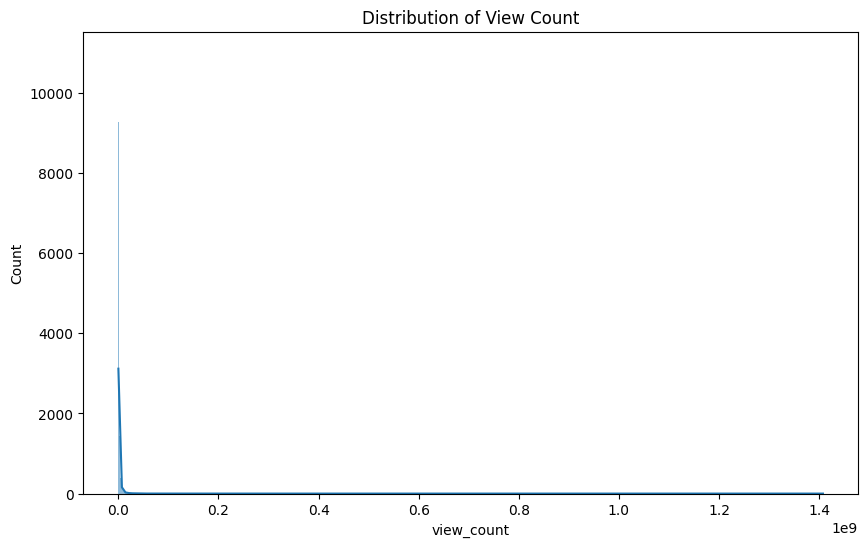

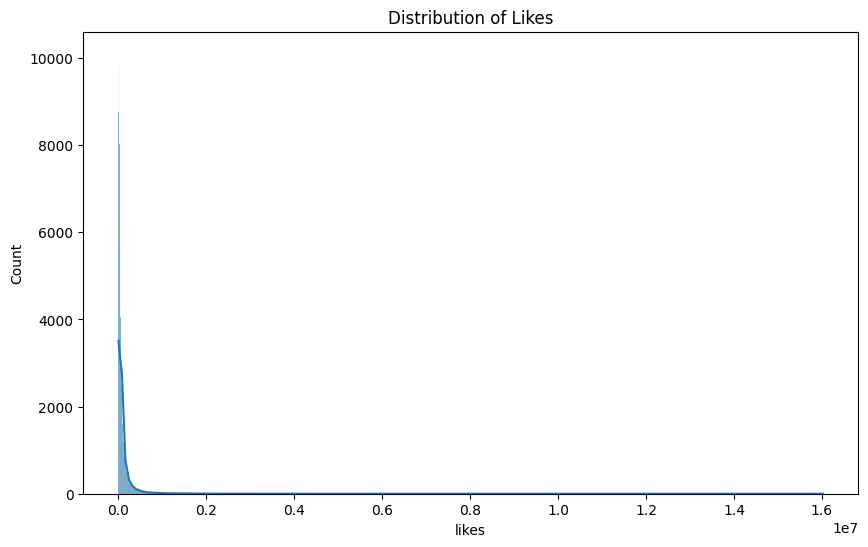

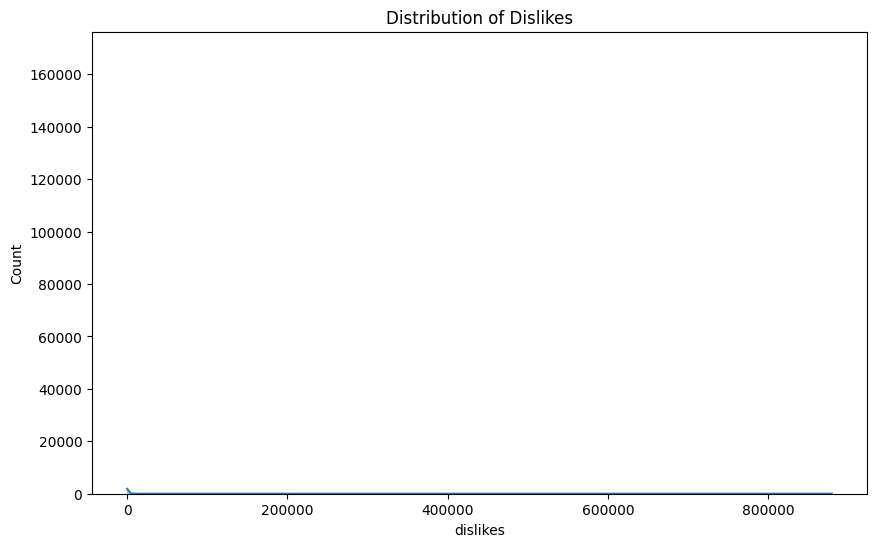

In [74]:
# Distribution of view_count
plt.figure(figsize=(10, 6))
sns.histplot(df['view_count'], kde=True)
plt.title('Distribution of View Count')
plt.show()

# Distribution of likes
plt.figure(figsize=(10, 6))
sns.histplot(df['likes'], kde=True)
plt.title('Distribution of Likes')
plt.show()

# youtube removes dislikes end of 2021
# Distribution of dislikes
plt.figure(figsize=(10, 6))
sns.histplot(df['dislikes'], kde=True)
plt.title('Distribution of Dislikes')
plt.show()

In [75]:
df_without_outliers = df[~df.video_id.isin(z_anomalies_df.video_id)]
df_without_outliers.reset_index(inplace=True)
df_without_outliers

,index,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,tags_words,description_words
0,0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,Videoblogging,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,"[brawadis, prank, basketball, skits, ghost, fu...","[subscribe, brawadis, http, bit, ly, subscribe..."
1,1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,0,0,"While running her own modding shop, Ramya Pare...","[apex, legends, apex, legends, characters, new...","[running, modding, shop, ramya, parekh, aka, r..."
2,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,0,0,I left youtube for a month and this is what ha...,"[jacksepticeye, funny, funny, meme, memes, jac...","[left, youtube, month, happenedmy, coffee, com..."
3,3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,0,0,Subscribe to XXL → http://bit.ly/subscribe-xxl...,"[xxl, freshman, xxl, freshmen, 2020, xxl, fres...","[subscribe, xxl, http, bit, ly, subscribe, xxl..."
4,4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,0,0,Transforming The LaBrant Family's empty white ...,"[labrant, family, diy, interior, design, makeo...","[transforming, labrant, family, empty, white, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258177,264150,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08 15:55:44+00:00,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,News & Politics,25,2024-04-15 00:00:00+00:00,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,0,0,Millions of people in the United States are tr...,"[morning, news, eclipses, travel, travel, news...","[millions, people, united, states, traveling, ..."
258178,264151,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04 11:00:02+00:00,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,Entertainment,24,2024-04-15 00:00:00+00:00,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,0,0,"John Oliver discusses food delivery apps, how ...",[none],"[john, oliver, discusses, food, delivery, apps..."
258179,264152,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07 14:53:25+00:00,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,Entertainment,24,2024-04-15 00:00:00+00:00,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,0,0,We reveal 12 things no-one tells you to expect...,"[japan, cdawgva, abroad, japan, trash, taste]","[reveal, 12, things, one, tells, expect, japan..."
258180,264153,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07 18:00:03+00:00,UChQ-d14tHB62nskossxO0tw,Joe Fazer,Entertainment,24,2024-04-15 00:00:00+00:00,gym|youtu

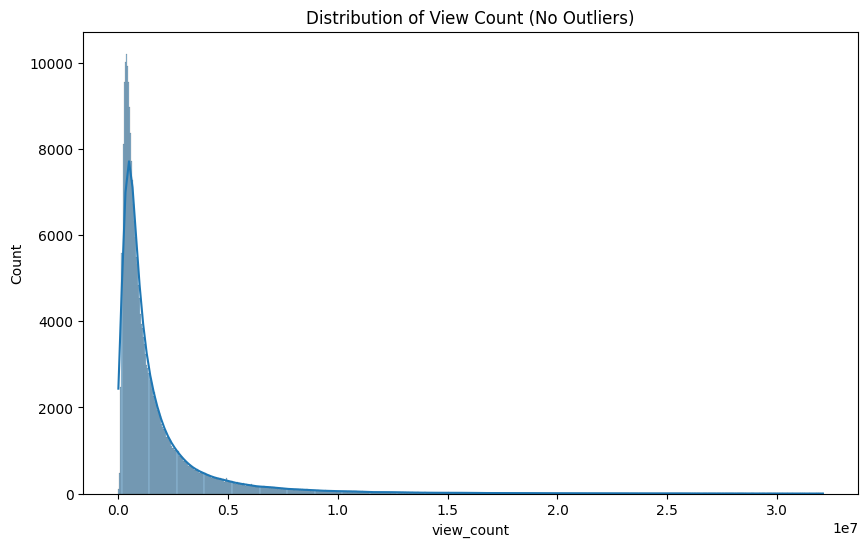

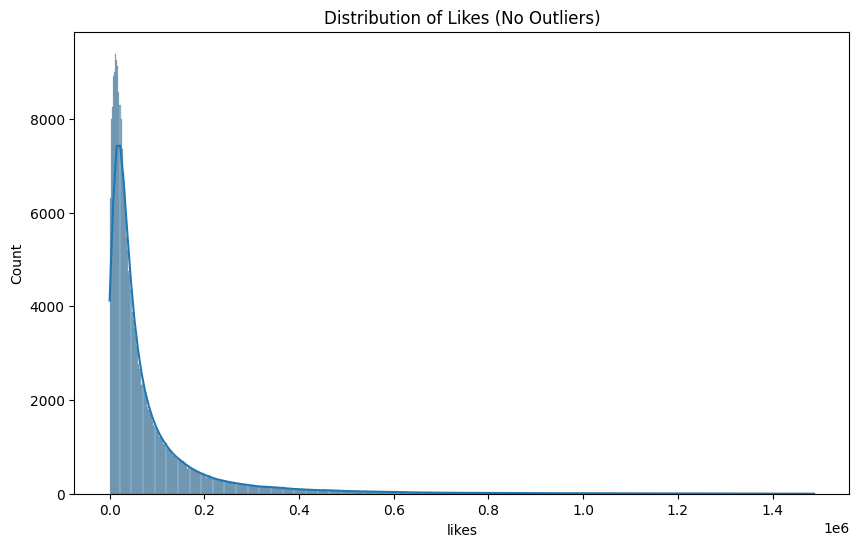

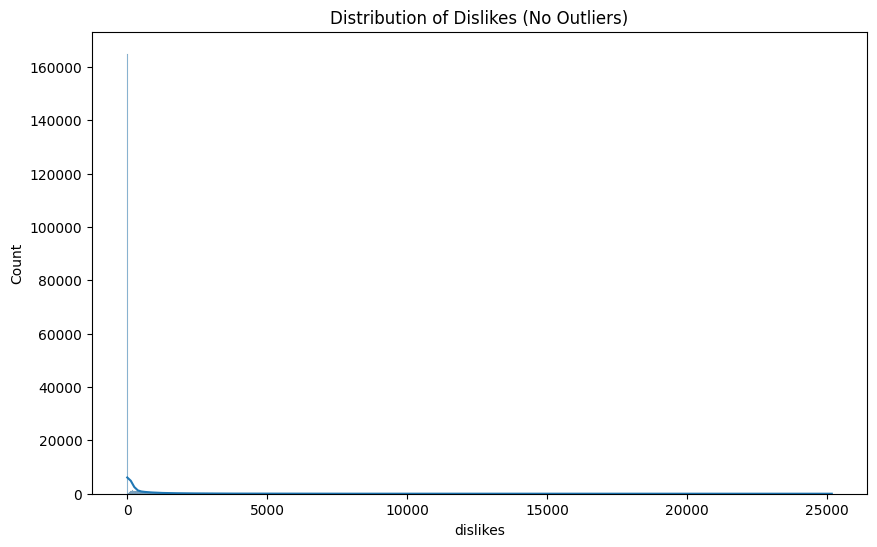

In [76]:
# Distribution of view_count
plt.figure(figsize=(10, 6))
sns.histplot(df_without_outliers['view_count'], kde=True)
plt.title('Distribution of View Count (No Outliers)')
plt.show()

# Distribution of likes
plt.figure(figsize=(10, 6))
sns.histplot(df_without_outliers['likes'], kde=True)
plt.title('Distribution of Likes (No Outliers)')
plt.show()

# Distribution of dislikes
plt.figure(figsize=(10, 6))
sns.histplot(df_without_outliers['dislikes'], kde=True)
plt.title('Distribution of Dislikes (No Outliers)')
plt.show()

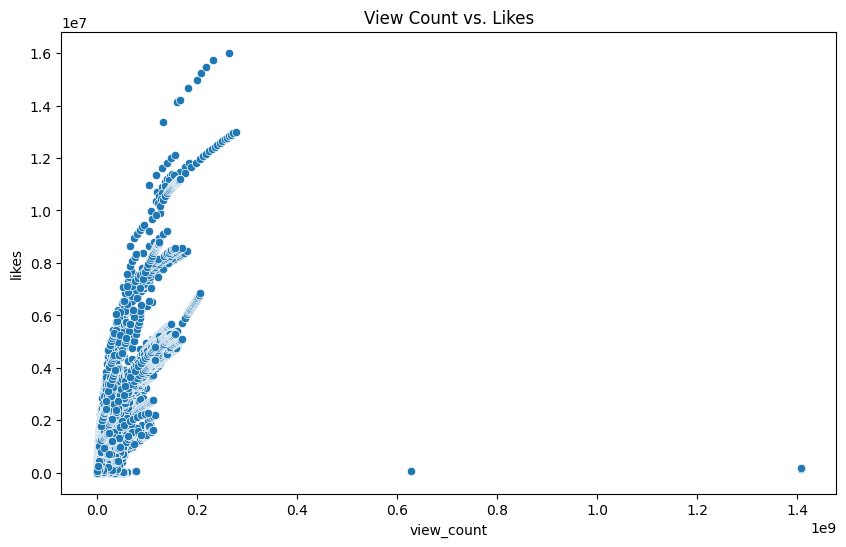

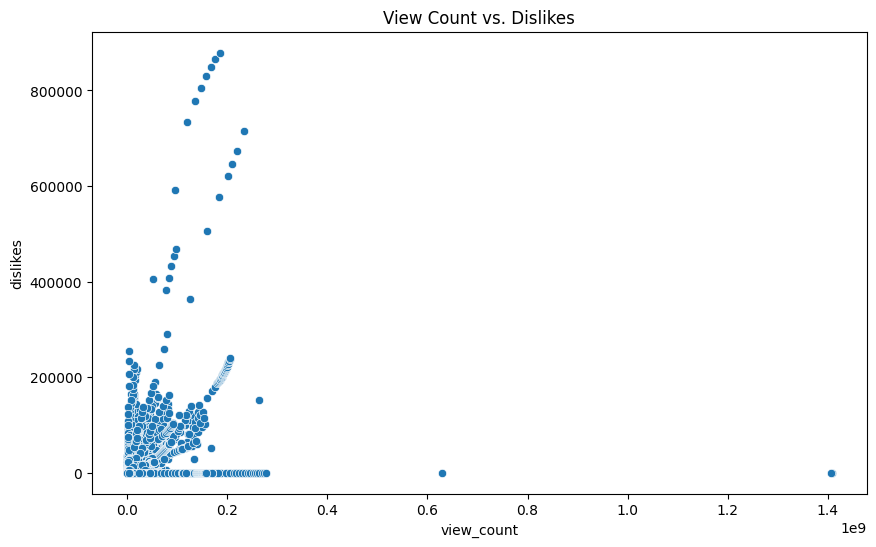

In [77]:
# Scatter plot of view_count vs. likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='likes', data=df)
plt.title('View Count vs. Likes')
plt.show()

# Scatter plot of view_count vs. dislikes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='dislikes', data=df)
plt.title('View Count vs. Dislikes')
plt.show()

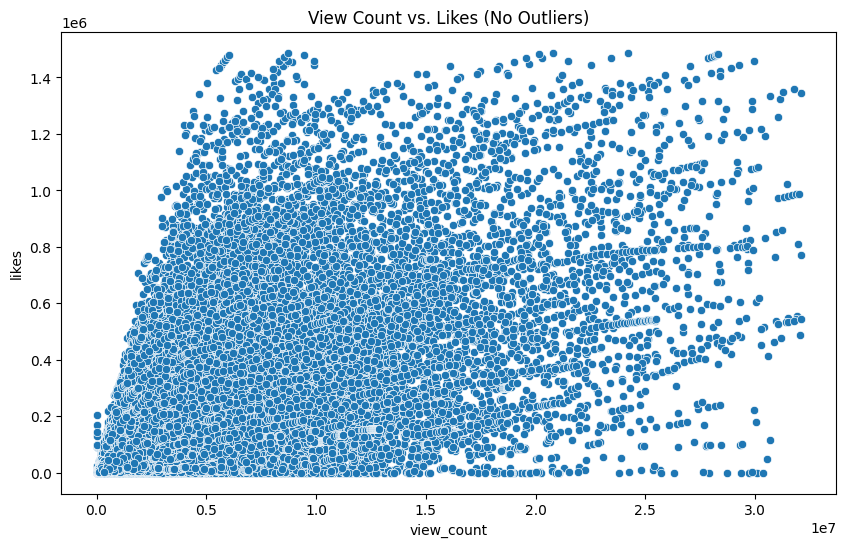

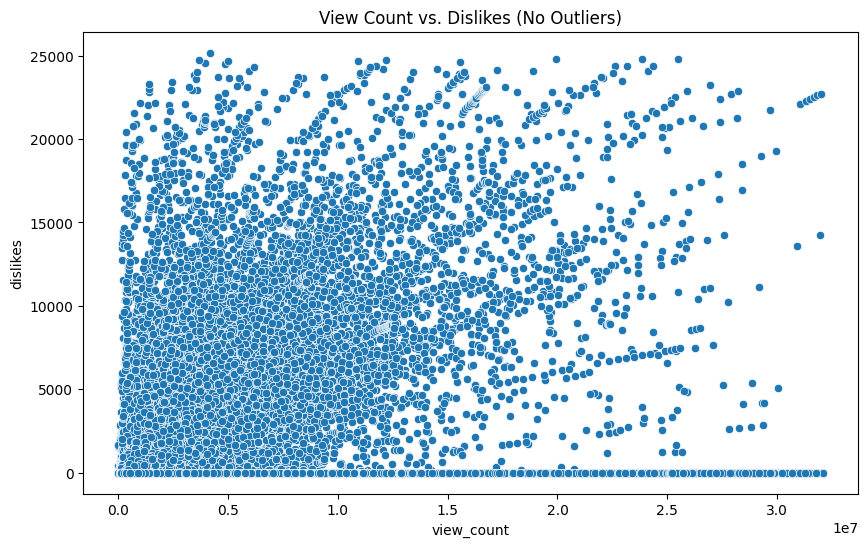

In [78]:
# Scatter plot of view_count vs. likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='likes', data=df_without_outliers)
plt.title('View Count vs. Likes (No Outliers)')
plt.show()

# Scatter plot of view_count vs. dislikes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='dislikes', data=df_without_outliers)
plt.title('View Count vs. Dislikes (No Outliers)')
plt.show()

In [79]:
df.loc[df['view_count'].idxmax()]

# https://www.youtube.com/watch?v=cc2-4ci4G84
# ^ originally had 1.4 billion views because it was played each time discord was opened -> yt mass removed the views
# (between then-- april 1st 2024-- and now, it has only 3.9m views)

video_id                                                   cc2-4ci4G84
title                                     Discord Loot Boxes are here.
publishedAt                                  2024-04-01 17:46:17+00:00
channelId                                     UCZ5XnGb-3t7jCkXdawN2tkA
channelTitle                                                   Discord
category_name                                            Entertainment
categoryId                                                          24
trending_date                                2024-04-03 00:00:00+00:00
tags                                                            [None]
view_count                                                  1407643634
likes                                                           126926
dislikes                                                             0
comment_count                                                    13987
thumbnail_link          https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg
commen

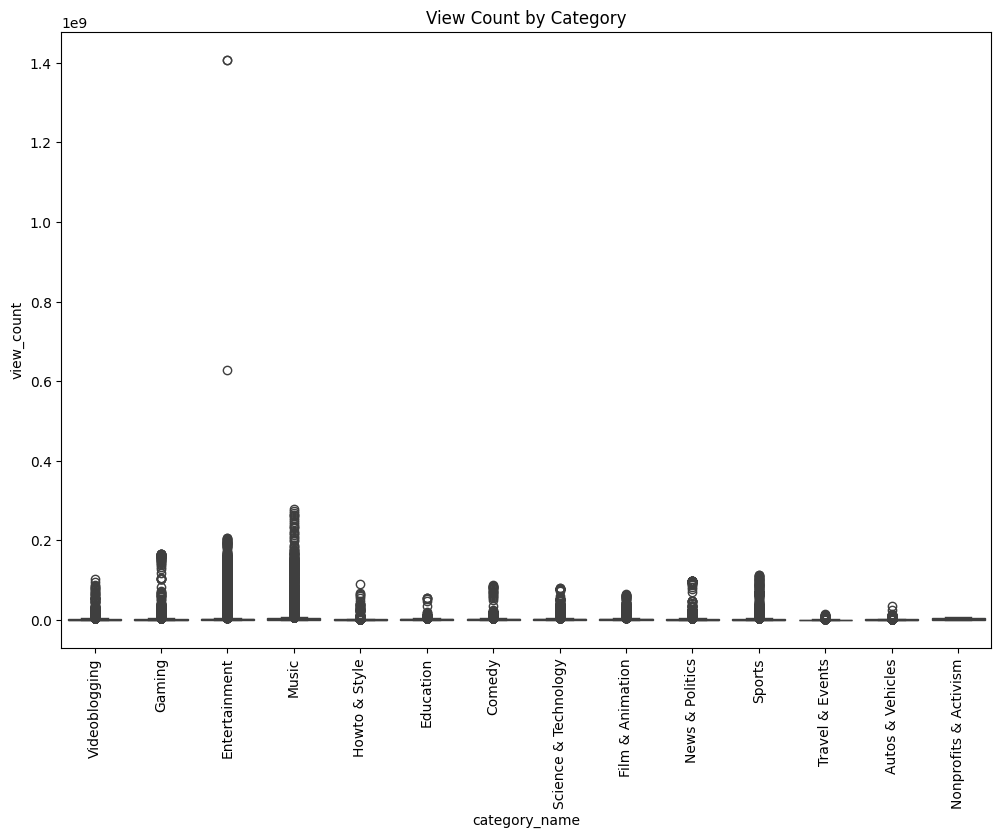

In [80]:
# Boxplot of view_count across categoryId
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='view_count', data=df)
plt.title('View Count by Category')
plt.xticks(rotation=90)
plt.show()

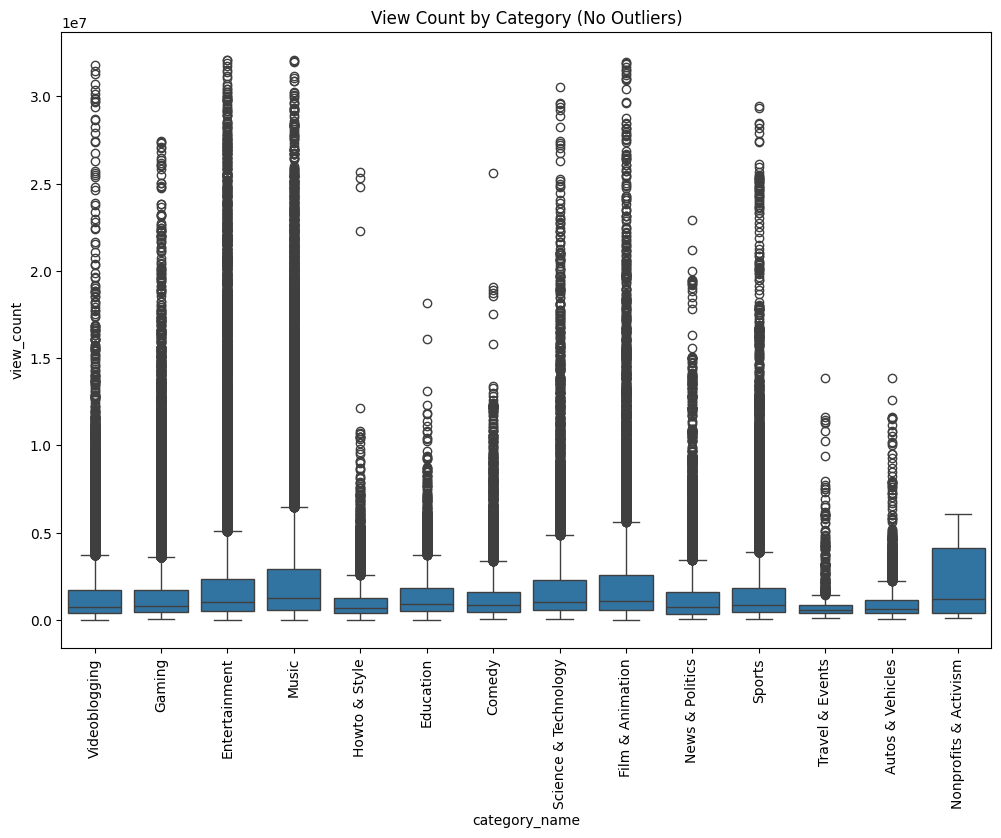

In [81]:
# Boxplot of view_count across categoryId
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='view_count', data=df_without_outliers)
plt.title('View Count by Category (No Outliers)')
plt.xticks(rotation=90)
plt.show()

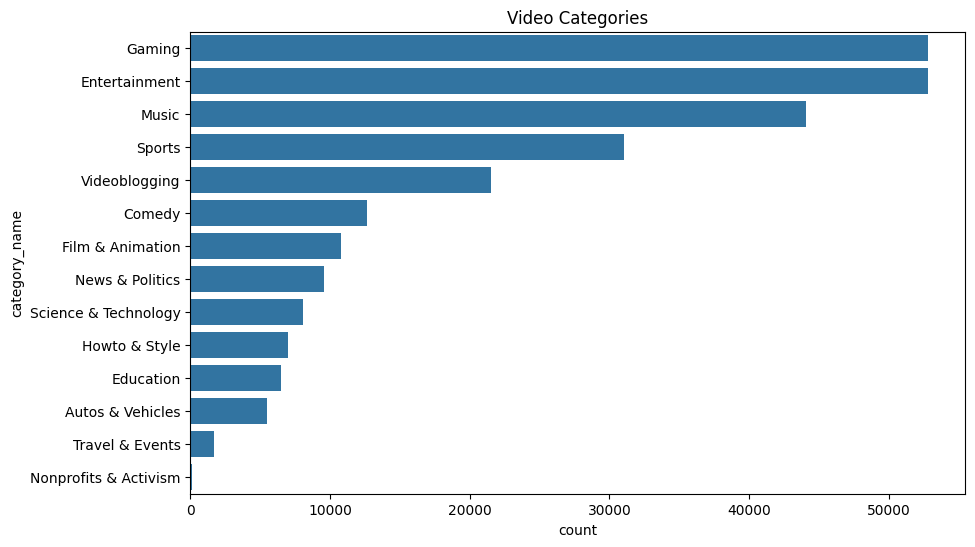

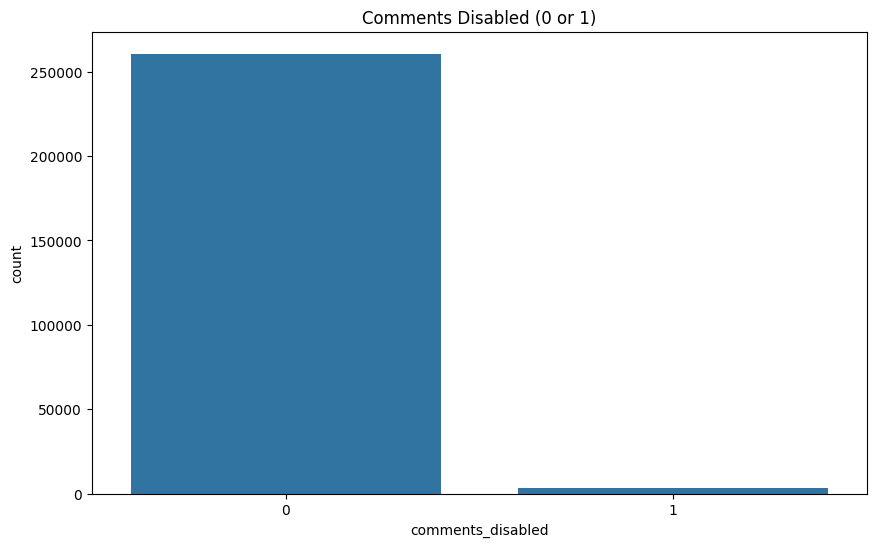

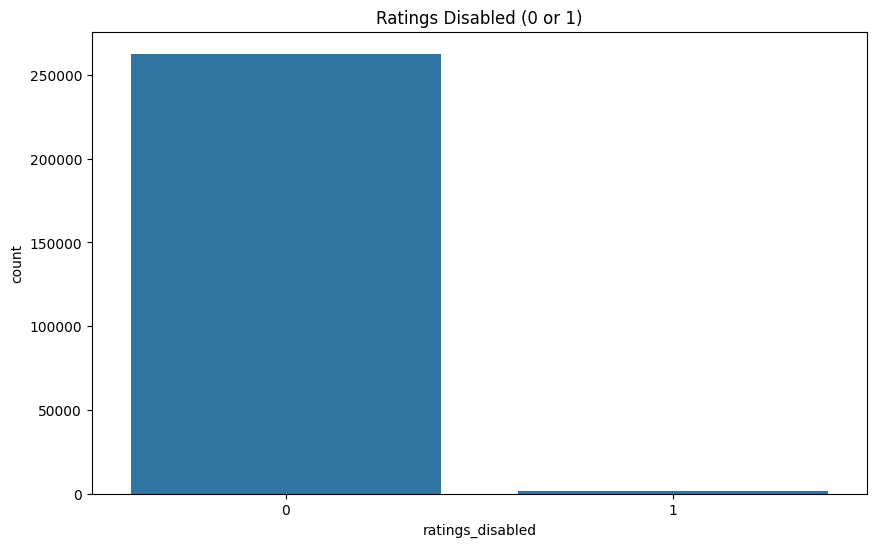

In [82]:
# Bar plot of categoryId
plt.figure(figsize=(10, 6))
sns.countplot(y='category_name', data=df, order=df['category_name'].value_counts().index)
plt.title('Video Categories')
plt.show()

# Bar plot of comments_disabled
plt.figure(figsize=(10, 6))
sns.countplot(x='comments_disabled', data=df)
plt.title('Comments Disabled (0 or 1)')
plt.show()

# Bar plot of ratings_disabled
plt.figure(figsize=(10, 6))
sns.countplot(x='ratings_disabled', data=df)
plt.title('Ratings Disabled (0 or 1)')
plt.show()

2020-08-03 21:51:14+00:00
2024-04-14 10:00:53+00:00


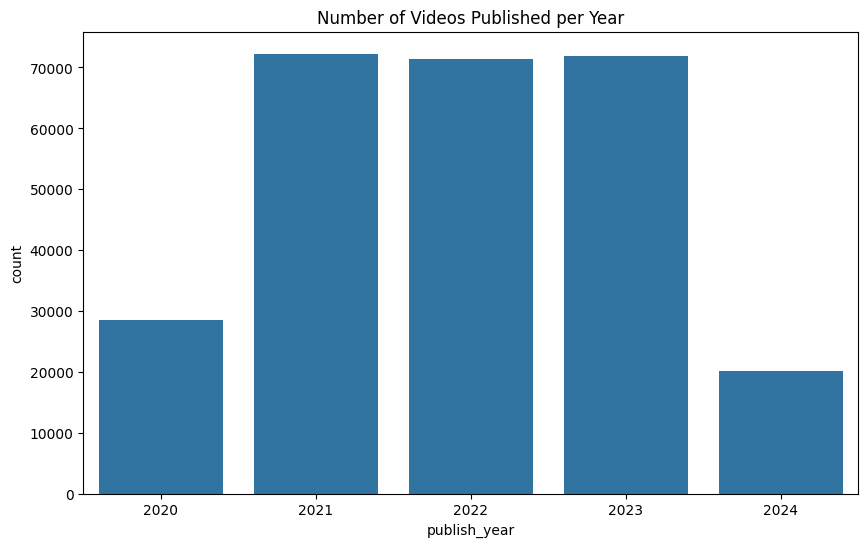

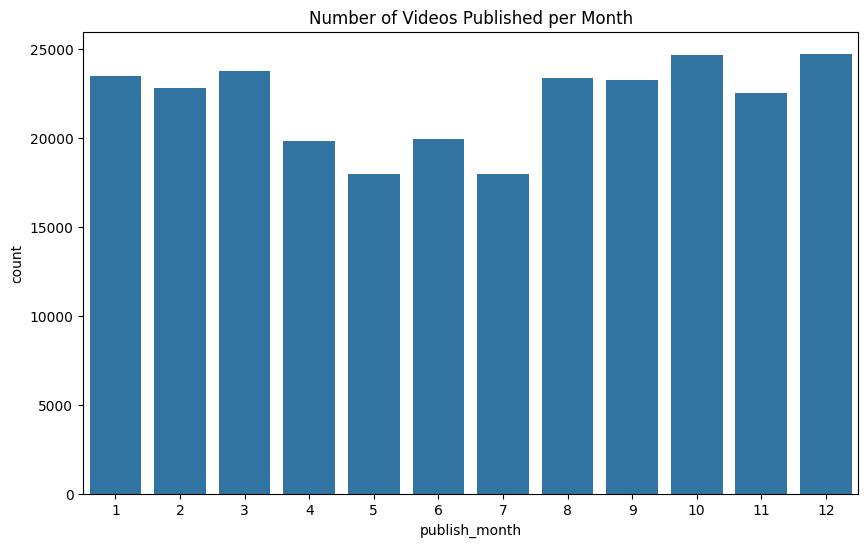

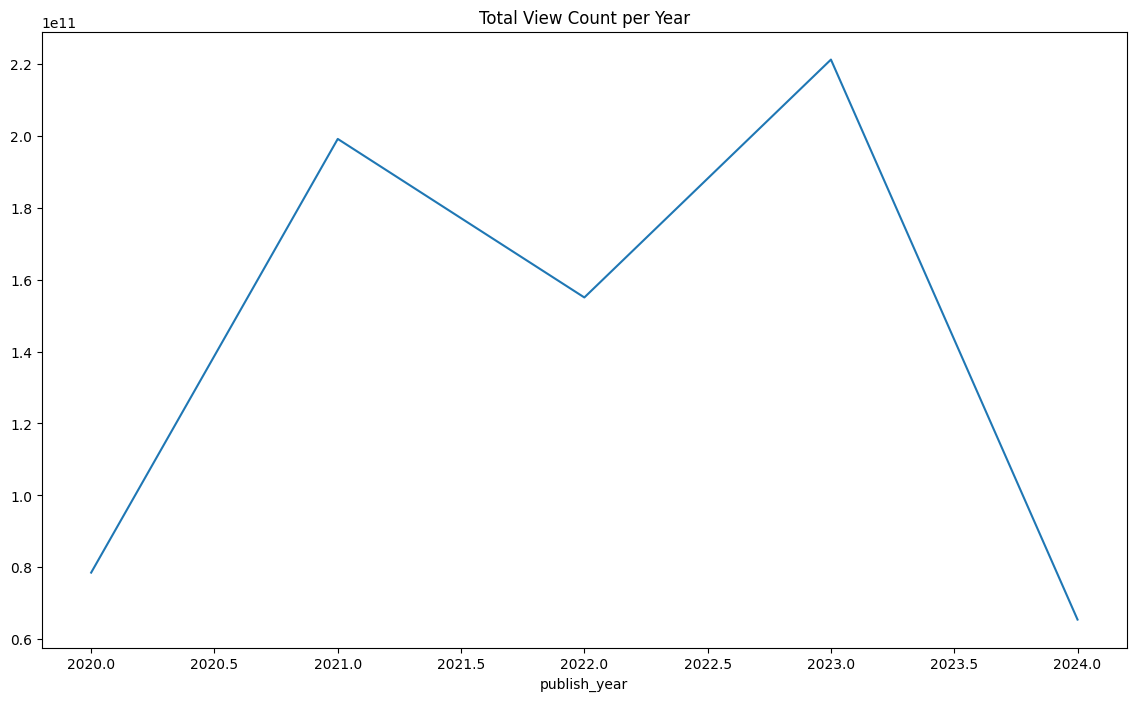

In [83]:
print(df['publishedAt'].min())
print(df['publishedAt'].max())
# Extract date features
df['publish_year'] = df['publishedAt'].dt.year
df['publish_month'] = df['publishedAt'].dt.month

# Plot the number of videos published per year
plt.figure(figsize=(10, 6))
sns.countplot(x='publish_year', data=df)
plt.title('Number of Videos Published per Year')
plt.show()

# Plot the number of videos published per month
plt.figure(figsize=(10, 6))
sns.countplot(x='publish_month', data=df)
plt.title('Number of Videos Published per Month')
plt.show()

# Plot trends in view_count over time
plt.figure(figsize=(14, 8))
df.groupby('publish_year')['view_count'].sum().plot()
plt.title('Total View Count per Year')
plt.show()

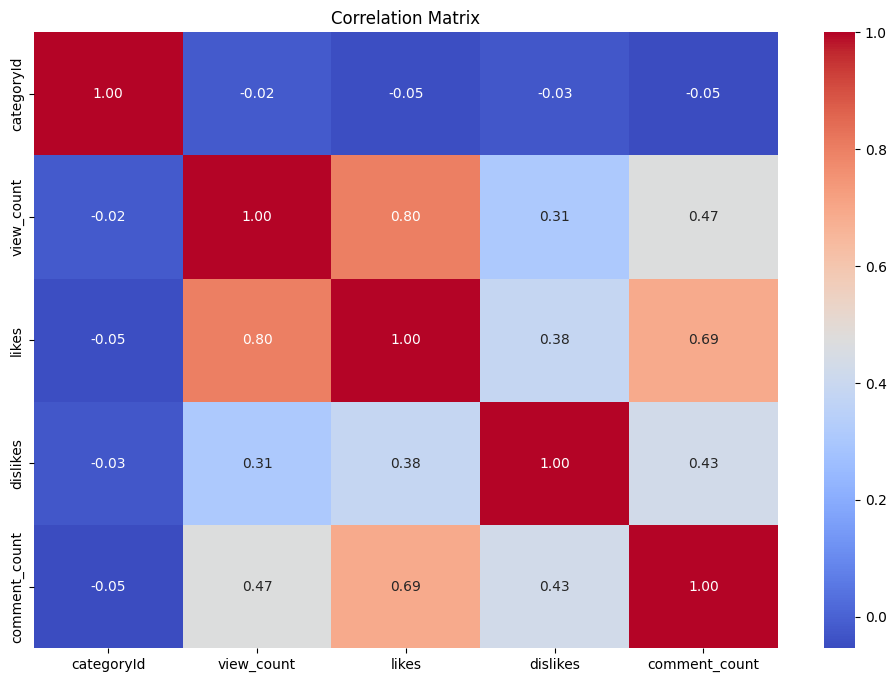

In [84]:
# Correlation matrix
corr_matrix = df[numerical_cols_to_check].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Week 1 & 2 Recommended Deliverables:

1. Project Docs: Scope and deliverables
2. Jupyter Notebook: Data preprocessing steps, including code for cleaning and transforming the data
3. **TODO |** Markdown File: Summary of the data issues encountered and how they were addressed (to be submitted at the end of Week 2)

### Week 3 & 4 Recommended Deliverables:
1. Jupyter Notebook: EDA process, including code, visualizations, and insights
2. **TODO |** PowerPoint Slides: Key findings and potential features (to be presented internally at the end of Week 4)

In [85]:
df.sort_values(by='view_count', ascending=False).head(40)

,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,tags_words,description_words,publish_year,publish_month
261580,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,Entertainment,24,2024-04-03 00:00:00+00:00,[None],1407643634,...,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,0,0,Why would we ever bring Loot Boxes into a chat...,[none],"[would, ever, bring, loot, boxes, chat, appope...",2024,4
261780,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,Entertainment,24,2024-04-04 00:00:00+00:00,[None],1406329649,...,0,17446,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,0,0,Why would we ever bring Loot Boxes into a chat...,[none],"[would, ever, bring, loot, boxes, chat, appope...",2024,4
261381,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,Entertainment,24,2024-04-02 00:00:00+00:00,[None],628718636,...,0,4829,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,0,0,Why would we ever bring Loot Boxes into a chat...,[none],"[would, ever, bring, loot, boxes, chat, appope...",2024,4
148961,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,10,2022-09-10 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,...,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,0,0,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...,"[yg, entertainment, yg, 와이지, k, pop, blackpink...","[blackpink, pink, venom, vkick, door, waving, ...",2022,8
148745,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,10,2022-09-09 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,...,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,0,0,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...,"[yg, entertainment, yg, 와이지, k, pop, blackpink...","[blackpink, pink, venom, vkick, door, waving, ...",2022,8
148546,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,10,2022-09-08 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,268758295,...,0,3504692,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,0,0,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...,"[yg, entertainment, yg, 와이지, k, pop, blackpink...","[blackpink, pink, venom, vkick, door, waving, ...",2022,8
148360,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,10,2022-09-07 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,264459017,...,0,3491132,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,0,0,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...,"[yg, entertainment, yg, 와이지, k, pop, blackpink...","[blackpink, pink, venom, vkick, door, waving, ...",2022,8
55800,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,Music,10,2021-05-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,...,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,0,0,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,"[bighit, 빅히트, 방탄소년단, bts, bangtan, 방탄]","[bts, 방탄소년단, butter, official, mv, credits, di...",2021,5
148156,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,10,2022-09-06 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,260126694,...,0,3479717,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,0,0,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...,"[yg, entertainment, yg, 와이지, k, pop, blackpink...","[blackpink, pink, venom, vkick, door, waving, ...",2022,8
147965,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,10,2022-09-05 00:00:00+00:00,YG En